# Introduction to Sequential Models

## Sources

1. [https://www.analyticsvidhya.com/blog/2021/06/recurrent-neural-networks-introduction-for-beginners/](https://www.analyticsvidhya.com/blog/2021/06/recurrent-neural-networks-introduction-for-beginners/)

2. [https://becominghuman.ai/introduction-to-rnn-and-lstm-part-1-b6a5934a791c](https://becominghuman.ai/introduction-to-rnn-and-lstm-part-1-b6a5934a791c)

3. [https://towardsdatascience.com/recurrent-neural-networks-by-example-in-python-ffd204f99470](https://towardsdatascience.com/recurrent-neural-networks-by-example-in-python-ffd204f99470)


## Bonus Links

1. [https://towardsdatascience.com/transformer-neural-network-step-by-step-breakdown-of-the-beast-b3e096dc857f](https://towardsdatascience.com/transformer-neural-network-step-by-step-breakdown-of-the-beast-b3e096dc857f)

2. [RNN Overview Video](https://youtu.be/6niqTuYFZLQ)

3. [MIT RNN Session Video](https://youtu.be/qjrad0V0uJE)

## Take Aways

- What are Sequential Models ?
- What is RNN
- What is LTSMs
- How Forward and Backward Propogation works in LTSM

## Sequential Data

* Time Series Data
    - Stock Market
    - Video
    - Music
    - App Logs
* Ordered Data
    - Text
    - DNA Sequence



## RNN

Revising Feed Forward Neural Networks or Recurrent Neural Network. 
* Recurrent neural network is a type of neural network in which the output form the previous step is fed as input to the current step

* In traditional neural networks, all the inputs and outputs are independent of each other, but this is not a good idea if we want to predict the next word in a sentence

* We need to remember the previous word in order to generate the next word in a sentence, hence traditional neural networks are not efficient for NLP applications

* RNNs also have a hidden stage which used to capture information about a sentence
RNNs have a ‘memory’, which is used to capture information about the calculations made so far

* In theory, RNNs can use information in arbitrary long sequences, but practically they are limited to look back only a few steps

**Visual Representation**
![RNN](rnn.jpg)

*Here, xt: input at time t, st: hidden state at time t, and Ot: output at time t*

Unfolding means writing the network for the complete sequence, for example, if a sequence has 4 words then the network will be unfolded into a 4 layered neural network

A traditional neural network uses different parameter at each layer while an RNN shares the same parameter across all the layers, in the diagram we could see that the same parameters (U, V, W) were being used across all the layers

Parameter U transformation the input xt to the state st

Parameter W transforms the previous state st-1 to the current state st

And, parameter V maps the computed internal state st to the output Ot 

*Note: Recurrent means the output at the current time step becomes the input to the next time step. At each element of the sequence, the model considers not just the current input, but what it remembers about the preceding elements.*

![Simple RNN Representation](simplernn.png)

## LSTM

At the heart of an RNN is a layer made of memory cells. The most popular cell at the moment is the Long Short-Term Memory (LSTM) which maintains a cell state as well as a carry for ensuring that the signal (information in the form of a gradient) is not lost as the sequence is processed. At each time step the LSTM considers the current word, the carry, and the cell state.

![LSTM](lstm.png)


## Simple RNN Example

In [56]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

The function below returns a model that includes a SimpleRNN layer and a Dense layer for learning sequential data. The input_shape specifies the parameter (time_steps x features). To simplify the example I am using only one feature only

In [57]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [58]:
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

In [59]:
demo_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


The object demo_model is returned with 2 hidden units created via a the SimpleRNN layer and 1 dense unit created via the Dense layer. The input_shape is set at 3×1 and a linear activation function is used in both layers for simplicity. 

In [60]:
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[1.3570188 0.4973284]]  wh =  [[-0.7503214   0.66107327]
 [-0.66107327 -0.7503214 ]]  bh =  [0. 0.]  wy = [[-0.9191341]
 [-0.842531 ]] by =  [0.]


wx ==> weights for input units

wh ==> weights for hidden units

bh ==> Bias for hidden units

wy ==> weights for dense layer

by ==> Bias for dense layer

Now let’s do a simple experiment to see how the layers from a SimpleRNN and Dense layer produce an output. Keep this figure in view.

![RNN Layers](rnnlayers.png)

We’ll input x for three time steps and let the network generate an output. The values of the hidden units at time steps 1, 2 and 3 will be computed. h0 is initialized to the zero vector. The output y3 is computed from h3 and wy. An activation function is not required as we are using linear units.

In [61]:
x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x,(1, 3, 1))
x_input

array([[[1],
        [2],
        [3]]])

In [62]:
y_pred_model = demo_model.predict(x_input)

In [63]:
y_pred_model

array([[-2.9347968]], dtype=float32)

In [64]:
m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
y3 = np.dot(h3, wy) + by

print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)

print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", y3)

h1 =  [[1.35701883 0.4973284 ]] h2 =  [[1.36706689 1.51858954]] h3 =  [[2.04141801 1.25628637]]
Prediction from network  [[-2.9347968]]
Prediction from our computation  [[-2.93479711]]


The following function reads the train and test data from a given URL and splits it into a given percentage of train and test data. It returns single dimensional arrays for train and test data after scaling the data between 0 and 1 using MinMaxScaler from scikit-learn.

In [65]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = pd.read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

In [66]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [67]:
train_data

array([0.22852638, 0.24665089, 0.2758077 , ..., 0.3506698 , 0.4546887 ,
       0.4862096 ], dtype=float32)

The next step is to prepare the data for Keras model training. The input array should be shaped as: total_samples x time_steps x features.

There are many ways of preparing time series data for training. We’ll create input rows with non-overlapping time steps. An example for time_steps = 2 is shown in the figure below. Here time_steps denotes the number of previous time steps to use for predicting the next value of the time series data.

![Data Prep](dataprep.png)

In [68]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

In [69]:
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [70]:
trainX[0], trainY[0]

(array([[0.22852638],
        [0.24665089],
        [0.2758077 ],
        [0.21946414],
        [0.33490935],
        [0.3289992 ],
        [0.37352246],
        [0.2612293 ],
        [0.29905435],
        [0.29747832],
        [0.6249015 ],
        [0.33569738]], dtype=float32),
 0.28881007)

In [72]:
trainX[1], trainY[1]

(array([[0.28881007],
        [0.29905435],
        [0.3514578 ],
        [0.34791175],
        [0.3546099 ],
        [0.39401102],
        [0.33648542],
        [0.40583134],
        [0.35933802],
        [0.2588652 ],
        [0.24940896],
        [0.2970843 ]], dtype=float32),
 0.2758077)

In [73]:
trainX[2]

array([[0.2758077 ],
       [0.1713948 ],
       [0.17848699],
       [0.22222221],
       [0.23916468],
       [0.19976358],
       [0.2612293 ],
       [0.23561858],
       [0.09259259],
       [0.09141055],
       [0.11229314],
       [0.17336485]], dtype=float32)

Create RNN Model And Train

In [74]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 1s - loss: 0.0157 - 1s/epoch - 5ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0134 - 341ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0116 - 349ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0100 - 346ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0086 - 378ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0074 - 341ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0065 - 333ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0059 - 344ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0054 - 317ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0051 - 341ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0049 - 344ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0047 - 346ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0046 - 334ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0045 - 348ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0044 - 344ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0.00

Compute And Print The Root Mean Square Error

In [75]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

In [76]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.063 RMSE
Test RMSE: 0.084 RMSE


In [77]:
trainX[10], trainY[10]

(array([[0.19030732],
        [0.17336485],
        [0.18439715],
        [0.18518518],
        [0.19306539],
        [0.19700551],
        [0.20094562],
        [0.28092986],
        [0.30417648],
        [0.23522457],
        [0.1824271 ],
        [0.22458628]], dtype=float32),
 0.2651694)

In [78]:
train_predict[10]

array([0.19081952], dtype=float32)

View the results

In [79]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

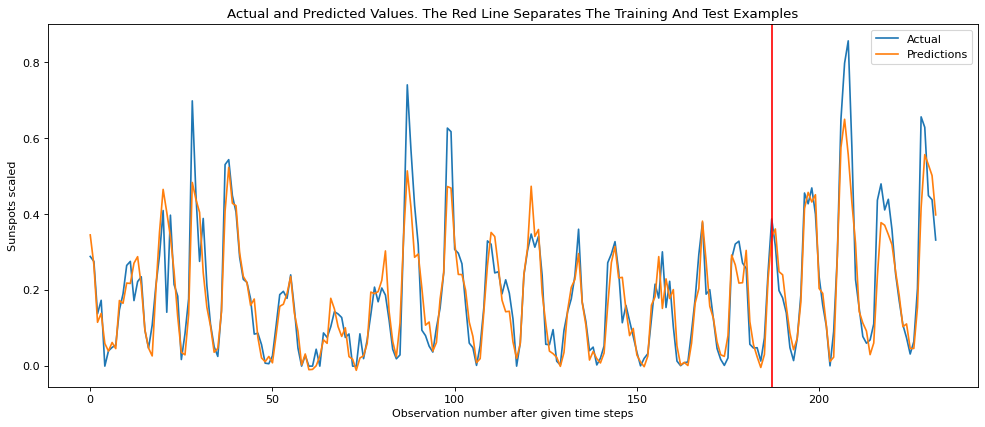

In [42]:
plot_result(trainY, testY, train_predict, test_predict)

Minimal Character Level Vanilla RNN Model

Source: https://gist.githubusercontent.com/karpathy/d4dee566867f8291f086/raw/119a6930b670bced5800b6b03ec4b8cb6b8ff4ec/min-char-rnn.py


In [1]:
import numpy as np

In [2]:
# data I/O
data = "\
This is Hello World to demonstrate RNN.\
The future king is the prince.\
Daughter is the princess.\
Son is the prince.\
Only a man can be a king.\
Only a woman can be a queen.\
The princess will be a queen.\
Queen and king rule the realm.\
The prince is a strong man.\
The princess is a beautiful woman.\
The royal family is the king and queen and their children.\
Prince is only a boy now. A boy will be a man\
"
print(data)
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print('data has %d characters, %d unique.' % (data_size, vocab_size))


This is Hello World to demonstrate RNN.The future king is the prince.Daughter is the princess.Son is the prince.Only a man can be a king.Only a woman can be a queen.The princess will be a queen.Queen and king rule the realm.The prince is a strong man.The princess is a beautiful woman.The royal family is the king and queen and their children.Prince is only a boy now. A boy will be a man
data has 388 characters, 35 unique.


In [3]:
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }


In [4]:
char_to_ix

{'H': 0,
 'o': 1,
 'w': 2,
 'i': 3,
 'd': 4,
 'S': 5,
 'O': 6,
 'b': 7,
 'p': 8,
 'q': 9,
 'h': 10,
 'e': 11,
 'y': 12,
 'g': 13,
 'D': 14,
 ' ': 15,
 'W': 16,
 'l': 17,
 '.': 18,
 's': 19,
 't': 20,
 'Q': 21,
 'N': 22,
 'm': 23,
 'A': 24,
 'u': 25,
 'T': 26,
 'r': 27,
 'P': 28,
 'c': 29,
 'n': 30,
 'a': 31,
 'k': 32,
 'R': 33,
 'f': 34}

In [5]:
ix_to_char

{0: 'H',
 1: 'o',
 2: 'w',
 3: 'i',
 4: 'd',
 5: 'S',
 6: 'O',
 7: 'b',
 8: 'p',
 9: 'q',
 10: 'h',
 11: 'e',
 12: 'y',
 13: 'g',
 14: 'D',
 15: ' ',
 16: 'W',
 17: 'l',
 18: '.',
 19: 's',
 20: 't',
 21: 'Q',
 22: 'N',
 23: 'm',
 24: 'A',
 25: 'u',
 26: 'T',
 27: 'r',
 28: 'P',
 29: 'c',
 30: 'n',
 31: 'a',
 32: 'k',
 33: 'R',
 34: 'f'}

In [6]:
# hyperparameters
hidden_size = 100 # size of hidden layer of neurons
seq_length = 25 # number of steps to unroll the RNN for
learning_rate = 1e-1

In [7]:
# model parameters
Wxh = np.random.randn(hidden_size, vocab_size)*0.01 # input to hidden
Whh = np.random.randn(hidden_size, hidden_size)*0.01 # hidden to hidden
Why = np.random.randn(vocab_size, hidden_size)*0.01 # hidden to output
bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size, 1)) # output bias

In [8]:
Wxh.shape

(100, 35)

In [9]:
print(Wxh, Whh, Why, bh, by)

[[-0.0030443   0.01962312  0.00472173 ...  0.01494307 -0.00945032
  -0.00786455]
 [-0.01173276 -0.00701253 -0.00950008 ... -0.00285088  0.01336411
  -0.0103097 ]
 [-0.00167927 -0.00277395  0.00056828 ... -0.0177218  -0.00951346
  -0.00032566]
 ...
 [-0.00209518 -0.00440793 -0.00361866 ... -0.00190199  0.004477
   0.00034588]
 [-0.00842329  0.01070947  0.01104561 ... -0.01782603  0.01620957
   0.0022372 ]
 [-0.02676498 -0.00190748 -0.00571514 ... -0.01267164  0.0178819
   0.01033592]] [[-0.01914438 -0.00185533 -0.00170707 ... -0.00725374 -0.01490402
  -0.00580319]
 [ 0.01472858 -0.00537825  0.00493901 ... -0.00666911 -0.00644047
   0.01652129]
 [ 0.01013535 -0.00578267 -0.00420063 ...  0.01159912  0.00702256
  -0.009943  ]
 ...
 [-0.01937039  0.00105095  0.00648256 ... -0.02565062  0.00047778
  -0.00826908]
 [ 0.00355527 -0.02494691  0.00176577 ... -0.02082683 -0.00117477
   0.00395196]
 [-0.0158433   0.01560398  0.00968476 ...  0.01607614  0.00937621
   0.00704065]] [[-0.00293174 -0.00

In [10]:
def lossFun(inputs, targets, hprev):
  """
  inputs,targets are both list of integers.
  hprev is Hx1 array of initial hidden state
  returns the loss, gradients on model parameters, and last hidden state
  """
  xs, hs, ys, ps = {}, {}, {}, {}
  hs[-1] = np.copy(hprev)
  loss = 0
  # forward pass
  for t in range(len(inputs)):
    xs[t] = np.zeros((vocab_size,1)) # encode in 1-of-k representation
    xs[t][inputs[t]] = 1
    hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh) # hidden state
    ys[t] = np.dot(Why, hs[t]) + by # unnormalized log probabilities for next chars
    ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars
    loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss)
  # backward pass: compute gradients going backwards
  dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
  dbh, dby = np.zeros_like(bh), np.zeros_like(by)
  dhnext = np.zeros_like(hs[0])
  for t in reversed(range(len(inputs))):
    dy = np.copy(ps[t])
    dy[targets[t]] -= 1 # backprop into y. see http://cs231n.github.io/neural-networks-case-study/#grad if confused here
    dWhy += np.dot(dy, hs[t].T)
    dby += dy
    dh = np.dot(Why.T, dy) + dhnext # backprop into h
    dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity
    dbh += dhraw
    dWxh += np.dot(dhraw, xs[t].T)
    dWhh += np.dot(dhraw, hs[t-1].T)
    dhnext = np.dot(Whh.T, dhraw)
  for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
    np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients
  return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]

In [11]:
def sample(h, seed_ix, n):
  """ 
  sample a sequence of integers from the model 
  h is memory state, seed_ix is seed letter for first time step
  """
  x = np.zeros((vocab_size, 1))
  x[seed_ix] = 1
  ixes = []
  for t in range(n):
    h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
    y = np.dot(Why, h) + by
    p = np.exp(y) / np.sum(np.exp(y))
    ix = np.random.choice(range(vocab_size), p=p.ravel())
    x = np.zeros((vocab_size, 1))
    x[ix] = 1
    ixes.append(ix)
  return ixes

In [12]:
n, p = 0, 0
mWxh, mWhh, mWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
mbh, mby = np.zeros_like(bh), np.zeros_like(by) # memory variables for Adagrad
smooth_loss = -np.log(1.0/vocab_size)*seq_length # loss at iteration 0

In [13]:
mWxh, mWhh, mWhy

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [14]:
while True:
  # prepare inputs (we're sweeping from left to right in steps seq_length long)
  if p+seq_length+1 >= len(data) or n == 0: 
    hprev = np.zeros((hidden_size,1)) # reset RNN memory
    p = 0 # go from start of data
  inputs = [char_to_ix[ch] for ch in data[p:p+seq_length]]
  targets = [char_to_ix[ch] for ch in data[p+1:p+seq_length+1]]

  # sample from the model now and then
  if n % 100 == 0:
    sample_ix = sample(hprev, inputs[0], 200)
    txt = ''.join(ix_to_char[ix] for ix in sample_ix)
    print('----\n %s \n----' % (txt, ))

  # forward seq_length characters through the net and fetch gradient
  loss, dWxh, dWhh, dWhy, dbh, dby, hprev = lossFun(inputs, targets, hprev)
  smooth_loss = smooth_loss * 0.999 + loss * 0.001
  if n % 100 == 0: print('iter %d, loss: %f' % (n, smooth_loss)) # print progress
  
  # perform parameter update with Adagrad
  for param, dparam, mem in zip([Wxh, Whh, Why, bh, by], 
                                [dWxh, dWhh, dWhy, dbh, dby], 
                                [mWxh, mWhh, mWhy, mbh, mby]):
    mem += dparam * dparam
    param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

  p += seq_length # move data pointer
  n += 1 # iteration counter 

----
 equsNcoPQ.qmglru pb DeOqaNioqudNfeynyikTlP.Ag tdocunrAS.llAeoSmk dgtiwablSARNcSelsiNy.hSPhc.tt sHe.OwbgTyiS.iyynihmOpmAluiuRpobtnhwDpsqenAhwfPOSbRd ympSiqflkaWTbwmchQuNqckuiWwkdiy h qdObpAobshRrffyoaS 
----
iter 0, loss: 88.883699
----
 rgau sr n  nr .srmQpi   emO rre sTeubub uea  rutrnu  it a naHkSebiblng n ua nOeothnaenni sridnnn pcn .reeikp.qrrn.  ilpa saus ccee  rs sge p ntey sr Srra   m cck    h cnir  eR ein  mt aag a enref kihu 
----
iter 100, loss: 89.434080
----
 sn ai..dtetkannensttsthton hiiinrietharmnno c.yrae w  nsnnesnhre lp e m.uh t. weimlriesASyhamaSng  Tchedhcc bch ytciinshthnplpncy   qhusacqc kn pycatui rnelnl Airiylei pn antnhcnace nhe aa.Dwn. bwan n 
----
iter 200, loss: 87.873313
----
 hrkocwaydfTwymboTbls.igweokTDpyrDlgpr.RTbqQQrrTpy wussyDPriwd..cso.r.SnPuoryTaDgcTgafgbr.bsr.bowTwddisTgwggPlDsfDPmiqrywey.Tsahw.kAfrgghrw.bsrgOuwwkksywWQgthgdrycgkart.TRPrgw.w.owu.oO.gblT.Rk.TDwelwob 
----
iter 300, loss: 86.291988
----
 ugbe t ein.d cng p qpaurininldrpid legnt

KeyboardInterrupt: 